In [1]:
import pandas as pd
import numpy as np
import sklearn.preprocessing, sklearn.decomposition,sklearn.linear_model, sklearn.pipeline, sklearn.metrics
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import nltk
%matplotlib inline

In [2]:
file = '/Users/rungsunan/code/kaggle/toxiccomment/train.csv'

In [3]:
df = pd.read_csv(file)

In [4]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0
3,77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0
4,79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0


In [5]:
df.describe()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,9.585100e+04,95851.000000,95851.000000,95851.000000,95851.000000,95851.000000,95851.000000
mean,4.994359e+11,0.096368,0.010068,0.053301,0.003182,0.049713,0.008492
std,2.890136e+11,0.295097,0.099832,0.224635,0.056320,0.217352,0.091762
min,2.225664e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.473437e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.001297e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.501088e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999882e+11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df[['toxic']
   ].count()

toxic    95851
dtype: int64

In [7]:
columnshead = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

In [8]:
plotlist = []
for col in columnshead:
    plotlist.append(df[col].sum())
plotlist

[9237, 965, 5109, 305, 4765, 814]

In [9]:
y_pos = np.arange(len(columnshead))

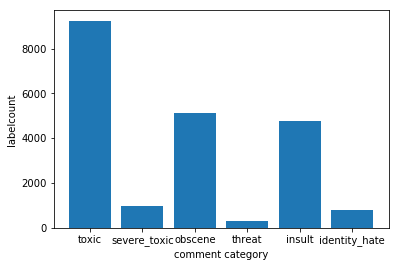

In [10]:
plt.bar(y_pos,plotlist,align='center')
plt.xticks(y_pos,columnshead)
plt.ylabel('labelcount')
plt.xlabel('comment category')

In [11]:
pd.crosstab([df.threat,df.insult,df.obscene,df.severe_toxic],df.toxic, margins=True)

toxic                                   0     1    All
threat insult obscene severe_toxic                    
0      0      0       0             86099  3498  89597
                      1                 0    25     25
              1       0               182  1080   1262
                      1                 0    97     97
       1      0       0               189   813   1002
                      1                 0    11     11
              1       0               128  2667   2795
                      1                 0   757    757
1      0      0       0                12    74     86
                      1                 0     8      8
              1       0                 1     8      9
                      1                 0     2      2
       1      0       0                 2    11     13
              1       0                 1   121    122
                      1                 0    65     65
All                                 86614  9237  95851

In [12]:
pd.crosstab(index=df['obscene'],columns=[ 'values'])

col_0,values
obscene,
0,90742
1,5109


In [13]:
pd.crosstab(df.toxic, df.severe_toxic, margins=True)

severe_toxic,0,1,All
toxic,,,
0,86614,0,86614
1,8272,965,9237
All,94886,965,95851


In [14]:
pd.crosstab(df.toxic, df.identity_hate, margins=True)

identity_hate,0,1,All
toxic,,,
0,86551,63,86614
1,8486,751,9237
All,95037,814,95851


In [15]:
df[['comment_text','toxic']]

,comment_text,toxic
0,"Nonsense? kiss off, geek. what I said is true...",1
1,"""\n\n Please do not vandalize pages, as you di...",0
2,"""\n\n """"Points of interest"""" \n\nI removed the...",0
3,Asking some his nationality is a Racial offenc...,0
4,The reader here is not going by my say so for ...,0
5,Fried chickens \n\nIs dat sum fried chickens?,0
6,Why can you put English for example on some pl...,0
7,Guy Fawkes \n\nim a resident in bridgwater and...,0
8,as far as nicknames go this article is embarra...,0
9,Woodland Meadows\nGood to hear that you correc...,0


In [16]:
import sys
import string
 
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
import os
from gensim import corpora, models
import json
import pandas as pd
from sklearn.datasets import load_svmlight_file

from sklearn import  svm,neighbors
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import pandas 
import numpy as np
from collections import defaultdict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample


In [17]:
tokenizer = RegexpTokenizer(r'\s+', gaps=True)

# create English stop words list
en_stop = set(get_stop_words('en'))
# print(en_stop)
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

In [21]:
texts = []
punctuation_string = '\"?!@#$%^&*()\';:+,/.-|~=\\'
table = str.maketrans(dict.fromkeys(punctuation_string))
# loop through document list
for index, row in df.iterrows():
    # clean and tokenize document string
    raw = row.comment_text
    raw = raw.translate(table)
    tokens = tokenizer.tokenize(raw)
    
    # remove stop words from tokens
    stopped_tokens = [j for j in tokens if not j in en_stop]
    # print(tokens)
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(k) for k in stopped_tokens]
    
    # add tokens to list
    texts.append((df.toxic[index], stemmed_tokens))

print("doc_set done!")
os.system('say "doc set done"')

doc_set done!


0

In [24]:
texts_dictionary = corpora.Dictionary([x[1] for x in texts])
print("there are: " + str(len(texts)) + " review documents in the dictionary")
print("dictionary done!")
os.system('say "Finished dictionary"')

there are: 95851 review documents in the dictionary
dictionary done!


0

In [25]:
def make_corpus(texts_tuple,dictionary):
    text_list = [x[1] for x in texts_tuple]
    return  [dictionary.doc2bow(text) for text in text_list]



In [18]:
model_dict = dict()
def make_model_and_corpus(texts_tuple,num_top, num_pass, model_name,dictionary):
    text_list = [x[1] for x in texts_tuple]
    temp_corpus = make_corpus(texts_tuple,dictionary)
    print(model_name)
    temp_model = models.LdaMulticore(corpus=temp_corpus,num_topics=num_top,id2word=dictionary, passes=num_pass)
    temp_model_corpus = temp_model[temp_corpus]
    temp_outcomes = [x[0] for x in texts_tuple]
    model_dict[model_name] = {"model": temp_model,"model_corpus": temp_model_corpus, "outcomes":temp_outcomes}
    print(model_dict)
    #model_dict[model_name] = {"model": models.ldamodel.LdaModel(corpus_name, num_topics=num_top, id2word = dictionary, passes=pass_num)}
    
    #modelname.save("/Users/rungsunan/spyder/yelpproject/" + str(modelname))
    #print(modelname + " for " + corpus + " complete!")
       
#make_model_and_corpus(corpus_p,2,5,"lda_model_corpus_p")
#make_model_and_corpus(corpus_2p,2,5,"lda_model_corpus_2p")
#make_model_and_corpus(corpus_all,2,5,"lda_model_corpus_all")
def save_model_and_corpus(modelname):
    model_dict[modelname]['model'].save('/Users/rungsunan/code/ADMfinal'+ modelname + '.model')
    corpora.SvmLightCorpus.serialize('/Users/rungsunan/code/ADMfinal'+ modelname + '_corpus.svmlight', model_dict[modelname]['model_corpus'],labels=model_dict[modelname]['outcomes'])


def load_ldamodel(modelname):
    print(modelname)
    X_temp, y_temp = load_svmlight_file("/Users/rungsunan/code/ADMfinal" + modelname)
    return (X_temp,y_temp)


def train_svm(X, y):
    """
    Create and train the Support Vector Machine.
    """
    clf = svm.SVC(kernel='linear')
    clf.fit(X, y)
    return clf

def histo_corpus(modelname):
    histo = []
    corpus = model_dict[modelname]['model_corpus']
    for doc in corpus:
        for i in range(len(doc)):
            if doc[i][1] > .1:
                histo.append(doc[i][0])
    return histo


def best_topics (texts_tuple, dictionary):
    grid = defaultdict(list)
    param_list = []
    perplex_list = []
    perword_list = []
    text_list = [x[1] for x in texts_tuple]
    temp_corpus = [dictionary.doc2bow(text) for text in text_list]
    number_of_words = sum(cnt for document in temp_corpus for _, cnt in document)
    parameter_list = [2,3,4,5,10,30,75,120]
    for parameter_value in parameter_list:      
        print ("starting pass for parameter_value = %.3f" % parameter_value)
        model = models.LdaMulticore(corpus=temp_corpus, workers=None, id2word=dictionary, num_topics=parameter_value, passes=4, iterations=20)
        perplex = model.bound(temp_corpus) # this is model perplexity not the per word perplexity
        print ("Total Perplexity: %s" % perplex)
        param_list.append(parameter_value)
        perplex_list.append(perplex)
        grid[parameter_value].append(perplex)

    
        per_word_perplex = np.exp2(-perplex / number_of_words)
        perword_list.append(per_word_perplex)
        print ("Per-word Perplexity: %s" % per_word_perplex)
        grid[parameter_value].append(per_word_perplex)
        #model.save(data_path + 'ldaMulticore_i10_T' + str(parameter_value) + '_training_corpus.lda')

    for numtopics in parameter_list:
        print (numtopics, '\t',  grid[numtopics])
    df = pandas.DataFrame(grid)
    ax = plt.figure(figsize=(7, 4), dpi=300).add_subplot(111)
    df.iloc[1].transpose().plot(ax=ax,  color="#254F09")
    plt.xlim(parameter_list[0], parameter_list[-1])
    plt.ylabel('Perplexity')
    plt.xlabel('topics')
    plt.title('')
    plt.show()

In [19]:
def create_sample_set(text_tuple,set_size):
    temp_texts = resample(text_tuple, replace = False, n_samples = set_size)
    return(temp_texts)

In [ ]:
texts_outcome_p100 = create_sample_set(texts,100)


In [ ]:
texts_outcome_p100[9]


In [ ]:
texts_outcome_p1k = create_sample_set(texts,1000)
texts_outcome_p3k = create_sample_set(texts,3000)
texts_outcome_p7k = create_sample_set(texts,7000)
texts_outcome_p10k = create_sample_set(texts,10000)
texts_outcome_p50k = create_sample_set(texts,50000)
texts_outcome_all = create_sample_set(texts,len(texts))


In [22]:
texts_outcome_p50k = create_sample_set(texts,50000)

In [ ]:
best_topics(texts_outcome_p50k, texts_dictionary)


In [26]:
make_model_and_corpus(texts_outcome_p50k,4  ,10,"lda_model_p50k_4topics",texts_dictionary)

lda_model_p50k_4topics


Process ForkPoolWorker-3:
Process ForkPoolWorker-6:
Process ForkPoolWorker-5:
Process ForkPoolWorker-7:
Process ForkPoolWorker-1:
Process ForkPoolWorker-2:
Process ForkPoolWorker-4:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/rungsunan/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/rungsunan/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/rungsunan/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/rungsunan/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/rungsunan/anaconda/envs/py36/lib/python3.6/multiproces

KeyboardInterrupt: 

  File "/Users/rungsunan/anaconda/envs/py36/lib/python3.6/multiprocessing/pool.py", line 103, in worker
    initializer(*initargs)
  File "/Users/rungsunan/anaconda/envs/py36/lib/python3.6/site-packages/gensim/models/ldamulticore.py", line 279, in worker_e_step
    chunk_no, chunk, worker_lda = input_queue.get()
  File "/Users/rungsunan/anaconda/envs/py36/lib/python3.6/site-packages/gensim/models/ldamulticore.py", line 279, in worker_e_step
    chunk_no, chunk, worker_lda = input_queue.get()
  File "/Users/rungsunan/anaconda/envs/py36/lib/python3.6/site-packages/gensim/models/ldamulticore.py", line 279, in worker_e_step
    chunk_no, chunk, worker_lda = input_queue.get()
  File "/Users/rungsunan/anaconda/envs/py36/lib/python3.6/site-packages/gensim/models/ldamulticore.py", line 279, in worker_e_step
    chunk_no, chunk, worker_lda = input_queue.get()
  File "/Users/rungsunan/anaconda/envs/py36/lib/python3.6/site-packages/gensim/models/ldamulticore.py", line 279, in worker_e_step
    ch

In [ ]:
model_dict['lda_model_p50k_4topics']['outcomes']

In [ ]:
save_model_and_corpus('lda_model_p50k_4topics')

In [ ]:
model_dict.keys()

In [27]:
(X_p50k_4topics, y_p50k_4topics) = load_ldamodel("lda_model_p50k_4topics_corpus.svmlight")

lda_model_p50k_4topics_corpus.svmlight


In [28]:
y_p50k_4topics

array([ 0.,  0.,  0., ...,  0.,  0.,  1.])

In [29]:
X_train_p50k_4topics, X_test_p50k_4topics, y_train_p50k_4topics, y_test_p50k_4topics = train_test_split(
    X_p50k_4topics, y_p50k_4topics, test_size=0.2, random_state=0)

In [30]:
y_test_p50k_4topics = y_test_p50k_4topics.astype(list).astype(int)

In [31]:
X_train_p50k_4topics = np.asarray(X_train_p50k_4topics.todense())
X_test_p50k_4topics = np.asarray(X_test_p50k_4topics.todense())

In [32]:
np.shape(y_train_p50k_4topics)

(40000,)

In [33]:
type(y_test_p50k_4topics[0])

numpy.int64

In [34]:
X_train_p50k_4topics[10:15]

array([[ 0.23453297,  0.        ,  0.46368801,  0.29581983],
       [ 0.03609821,  0.03838215,  0.03631072,  0.88920892],
       [ 0.36484124,  0.02493716,  0.02422321,  0.58599839],
       [ 0.        ,  0.62350352,  0.36578658,  0.        ],
       [ 0.        ,  0.13601267,  0.        ,  0.85810119]])

In [35]:
type(y_test_p50k_4topics)

numpy.ndarray

In [38]:
k_range = [1,3,5,7,11,15]
param_grid = dict(n_neighbors=k_range)
knn=KNeighborsClassifier()

In [39]:
param_grid

{'n_neighbors': [1, 3, 5, 7, 11, 15]}

In [40]:
knn.fit(X_p50k_4topics,y_p50k_4topics)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
knn.predict(X_p50k_4topics)